In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# 9.

In [2]:
Auto = pd.read_csv('Auto.data', delim_whitespace=True)
Auto = pd.read_csv('Auto.data',
                   na_values=['?'],
                   delim_whitespace=True)
Auto['horsepower'].sum()
Auto = Auto.dropna()
Auto = Auto.reset_index(drop=True) #add this cause breaks when dropping later
Auto

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\3793546152.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Auto = pd.read_csv('Auto.data', delim_whitespace=True)
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\3793546152.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Auto = pd.read_csv('Auto.data',


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [3]:
Auto_numeric = Auto.drop(columns=["name"]) #everything blows up if i dont do this
Auto_numeric

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


a. Produce a scatterplot matrix which includes all of the variables
in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

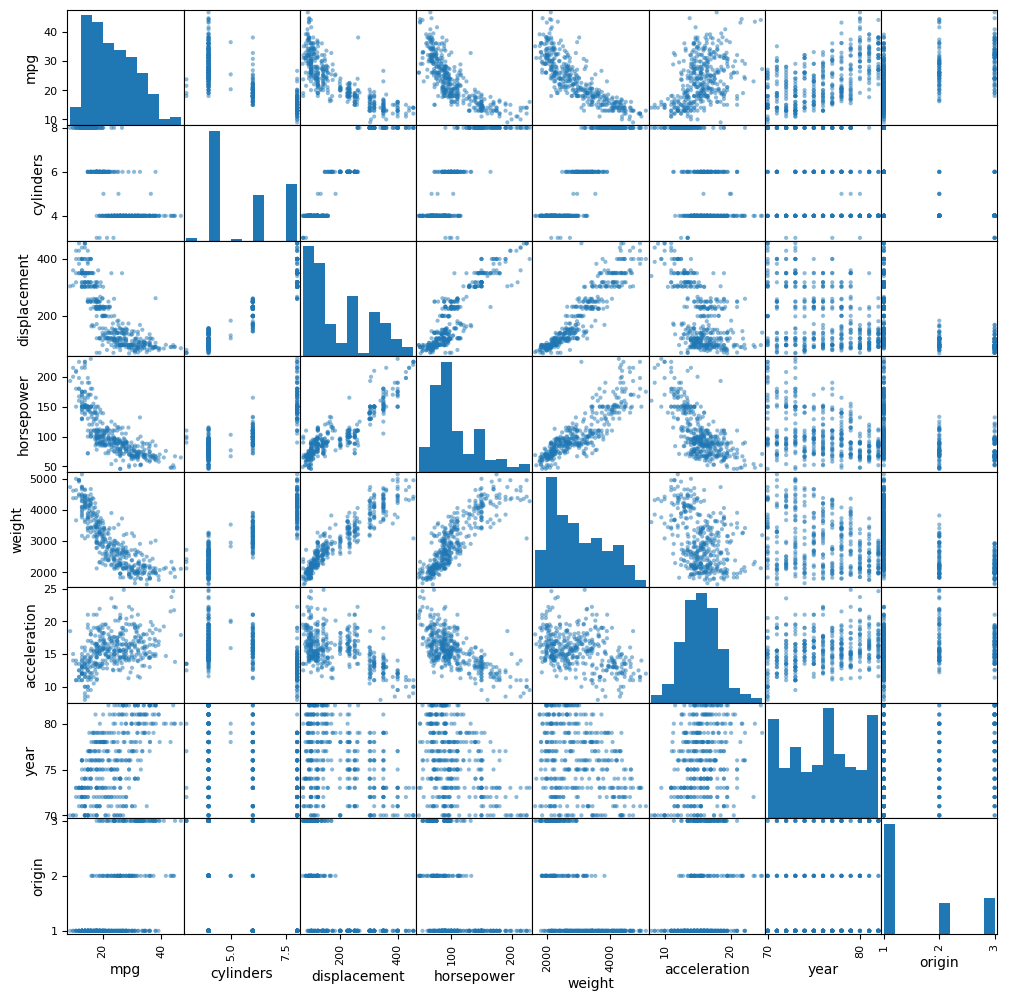

In [4]:
pd.plotting.scatter_matrix(Auto_numeric, figsize=(12, 12), diagonal='hist')

b. Compute the matrix of correlations between the variables using
the DataFrame.corr() method.

In [5]:
Auto_numeric.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


c. Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.
Comment on the output. For instance:

In [6]:
X = Auto_numeric.drop(columns=["mpg"])
y = Auto_numeric["mpg"]

model = sm.OLS(y, X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
cylinders,-0.7055,0.323,-2.181,0.030
displacement,0.0219,0.008,2.871,0.004
horsepower,-0.0396,0.013,-3.147,0.002
weight,-0.0060,0.001,-9.258,0.000
acceleration,-0.0796,0.090,-0.881,0.379
year,0.5836,0.024,24.150,0.000
origin,1.3100,0.281,4.663,0.000


i. Is there a relationship between the predictors and the re-
sponse? Use the anova_lm() function from statsmodels to
answer this question.

In [7]:
#Note: this breaks for some reason and no idea why, statsmodels
#       github shows other people had this problem so using their 
#       solution to this error.

# anova_results = anova_lm(results)

In [8]:
#https://github.com/statsmodels/statsmodels/issues/8241
import statsmodels.formula.api as smf

predictors = Auto.columns.drop(['name', 'mpg'])

formula = ' + '.join(predictors)

model_auto2 = smf.ols(f'mpg ~ {formula}', data=Auto).fit()

anova_lm(model_auto2)

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


There is definitely a relationship betwen the predictors and the responses. The null hyps can be rejected, all except for acceleration, who's p-value shows its not very correlated to the results.

ii. Which predictors appear to have a statistically significant
relationship to the response?

<ol>
    <li>cylinders</li>
    <li>displacement</li>
    <li>horsepower</li>
    <li>weight</li>
    <li>year</li>
    <li>origin</li>
</ol>

iii. What does the coefficient for the year variable suggest?

The coeff for the year is positive. Shows that theres a positive relationship between year and mpg. Newer cars have better gas milage.

d. Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

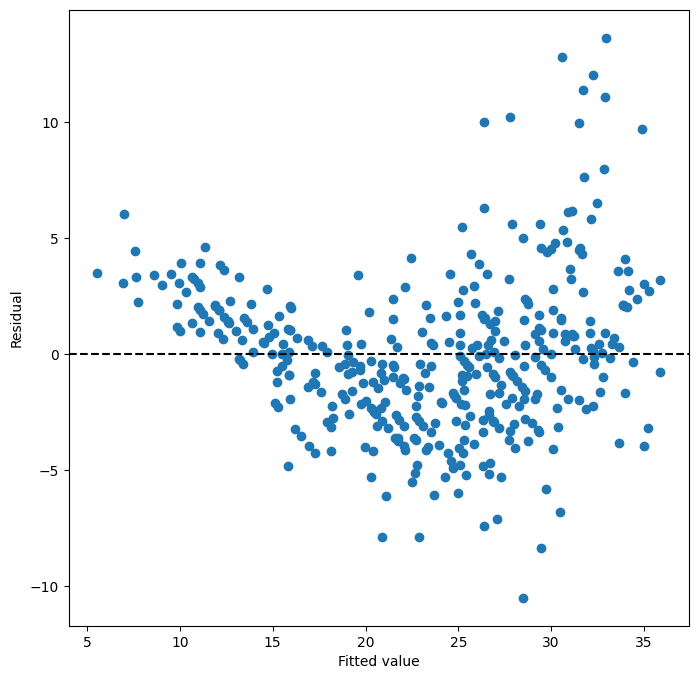

In [9]:
#fitted and residual
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

There seems to be a kind of parabolic shape to the plot here, could be evidence of non linearity, though most points are near the 0 line.

13

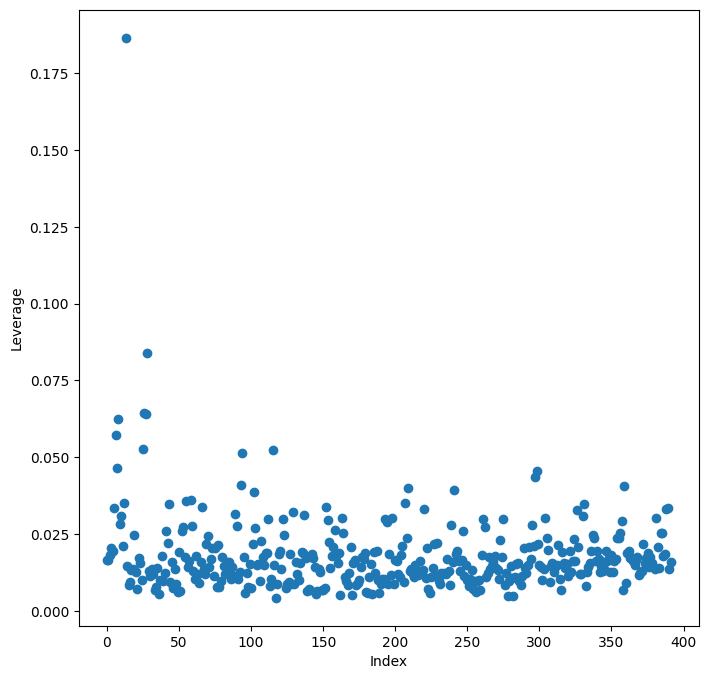

In [10]:
#index and leverage
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

There influence spread is pretty tame across the plot here, except for one data point all the way in the top left.

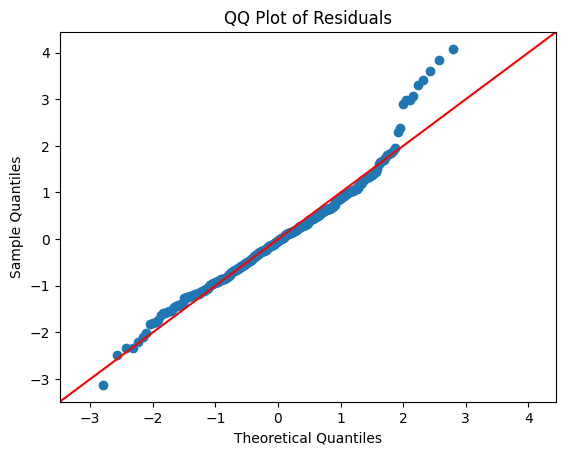

In [11]:
sm.qqplot(results.resid, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

Distribution of points seems fine except towards the top of the plot where it kinda veers off a little.

e. Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?

In [12]:
X = MS(['horsepower', 'weight', ('horsepower', 'weight')]).fit_transform(Auto_numeric)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,63.557900,2.343000,27.127,0.0
horsepower,-0.250800,0.027000,-9.195,0.0
weight,-0.010800,0.001000,-13.921,0.0
horsepower:weight,0.000054,0.000007,8.054,0.0


In [13]:
X = MS(['cylinders', 'displacement', ('cylinders', 'displacement')]).fit_transform(Auto_numeric)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,48.2204,2.347,20.545,0.0
cylinders,-2.4184,0.535,-4.524,0.0
displacement,-0.1344,0.016,-8.321,0.0
cylinders:displacement,0.0118,0.002,5.711,0.0


In [14]:
X = MS(['horsepower', 'year', ('horsepower', 'year')]).fit_transform(Auto_numeric)
model4 = sm.OLS(y, X)
summarize(model4.fit())

,coef,std err,t,P>|t|
intercept,-126.6089,12.117,-10.449,0.0
horsepower,1.0457,0.115,9.063,0.0
year,2.1920,0.161,13.585,0.0
horsepower:year,-0.0160,0.002,-10.217,0.0


In [15]:
X = MS(['horsepower', 'origin', ('horsepower', 'origin')]).fit_transform(Auto_numeric)
model5 = sm.OLS(y, X)
summarize(model5.fit())

,coef,std err,t,P>|t|
intercept,26.7910,1.697,15.785,0.0
horsepower,-0.0594,0.017,-3.574,0.0
origin,7.8712,1.139,6.910,0.0
horsepower:origin,-0.0634,0.013,-4.832,0.0


In [16]:
X = MS(['horsepower', 'acceleration', ('horsepower', 'acceleration')]).fit_transform(Auto_numeric)
model6 = sm.OLS(y, X)
summarize(model6.fit())

,coef,std err,t,P>|t|
intercept,33.5124,3.420,9.798,0.000
horsepower,0.0176,0.027,0.641,0.522
acceleration,0.8003,0.212,3.777,0.000
horsepower:acceleration,-0.0157,0.002,-7.838,0.000


In [17]:
X = MS(['weight', 'origin', ('weight', 'origin')]).fit_transform(Auto_numeric)
model7 = sm.OLS(y, X)
summarize(model7.fit())

,coef,std err,t,P>|t|
intercept,38.8991,2.203,17.656,0.000
weight,-0.0055,0.001,-7.064,0.000
origin,4.1313,1.498,2.758,0.006
weight:origin,-0.0013,0.001,-2.037,0.042


I'm struggling to find anything where horsepower isn't relevant to. On the other hand, it looks like origin and weight doesn't have much interaction.

f. Try a few different transformations of the variables, such as
log(X), √X, X2. Comment on your findings.

In [18]:
X = Auto_numeric.drop(columns=["mpg", "acceleration"])
model8 = sm.OLS(y, X)

In [19]:
x_log = np.log(X)
x_sqrt = np.sqrt(X)
x_sqrd = X**2

log_model = sm.OLS(y, x_log)
sqrt_model = sm.OLS(y, x_sqrt)
sqrd_model = sm.OLS(y, x_sqrd)

In [20]:
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3912.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                        0.00
Time:                        13:47:13   Log-Likelihood:                         -1005.1
No. Observations:                 392   AIC:                                      2022.
Df Residuals:                     386   BIC:                                      2046.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders        1.3771      1.710      0.805      0.421      -1.986       4.740
displacement     1.1272      1.520      0.742      0.459      -1.862       4.116
horsepower      -4.0166      1.072     -3.748      0.000      -6.124      -1.910
weight         -19.3549      1.719    -11.258      0.000     -22.735     -15.975
year            43.2738      1.954     22.149      0.000      39.432      47.115
origin           1.5437      0.522      2.957      0.003       0.517       2.570
==============================================================================
Omnibus:                       43.989   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.030
Skew:                           0.659   Prob(JB):                     2.54e-18
Kurtosis:                       4.795   Cond. No.                         194.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sqrt_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3414.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                        0.00
Time:                        13:47:13   Log-Likelihood:                         -1031.3
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     386   BIC:                                      2098.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -2.3164      1.589     -1.458      0.146      -5.440       0.807
displacement     0.4861      0.235      2.071      0.039       0.025       0.948
horsepower      -0.9346      0.224     -4.179      0.000      -1.374      -0.495
weight          -0.6821      0.068     -9.964      0.000      -0.817      -0.547
year             7.4944      0.296     25.288      0.000       6.912       8.077
origin           2.6497      0.803      3.299      0.001       1.070       4.229
==============================================================================
Omnibus:                       45.111   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.065
Skew:                           0.683   Prob(JB):                     2.49e-18
Kurtosis:                       4.760   Cond. No.                         548.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
sqrd_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              3075.
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                   2.42e-322
Time:                        13:47:13   Log-Likelihood:                         -1051.4
No. Observations:                 392   AIC:                                      2115.
Df Residuals:                     386   BIC:                                      2139.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0936      0.025     -3.786      0.000      -0.142      -0.045
displacement  5.456e-05   1.38e-05      3.940      0.000    2.73e-05    8.18e-05
horsepower    -6.95e-05   4.49e-05     -1.548      0.123      -0.000    1.88e-05
weight       -8.641e-07   8.59e-08    -10.062      0.000   -1.03e-06   -6.95e-07
year             0.0055      0.000     52.719      0.000       0.005       0.006
origin           0.4230      0.069      6.132      0.000       0.287       0.559
==============================================================================
Omnibus:                       26.818   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.874
Skew:                           0.476   Prob(JB):                     8.07e-10
Kurtosis:                       4.287   Cond. No.                     4.23e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
summarize(model8.fit())

,coef,std err,t,P>|t|
cylinders,-0.7141,0.323,-2.210,0.028
displacement,0.0229,0.008,3.036,0.003
horsepower,-0.0337,0.011,-3.157,0.002
weight,-0.0063,0.001,-10.841,0.000
year,0.5680,0.016,34.664,0.000
origin,1.2937,0.280,4.617,0.000


In [24]:
summarize(log_model.fit())

,coef,std err,t,P>|t|
cylinders,1.3771,1.710,0.805,0.421
displacement,1.1272,1.520,0.742,0.459
horsepower,-4.0166,1.072,-3.748,0.000
weight,-19.3549,1.719,-11.258,0.000
year,43.2738,1.954,22.149,0.000
origin,1.5437,0.522,2.957,0.003


In [25]:
summarize(sqrt_model.fit())

,coef,std err,t,P>|t|
cylinders,-2.3164,1.589,-1.458,0.146
displacement,0.4861,0.235,2.071,0.039
horsepower,-0.9346,0.224,-4.179,0.000
weight,-0.6821,0.068,-9.964,0.000
year,7.4944,0.296,25.288,0.000
origin,2.6497,0.803,3.299,0.001


In [26]:
summarize(sqrd_model.fit())

,coef,std err,t,P>|t|
cylinders,-9.360000e-02,2.500000e-02,-3.786,0.000
displacement,5.456000e-05,1.380000e-05,3.940,0.000
horsepower,-6.950000e-05,4.490000e-05,-1.548,0.123
weight,-8.641000e-07,8.590000e-08,-10.062,0.000
year,5.500000e-03,0.000000e+00,52.719,0.000
origin,4.230000e-01,6.900000e-02,6.132,0.000


The log model definitely had problems with cylinders, to a lesser extent the square root model had that problem too. Both didn't really seem to fit the model very well. On the other hand, the squared model seemed to fit better than the normal model, with the exception of the horsepower term.

# 10

In [27]:
#https://islp.readthedocs.io/en/latest/datasets/Carseats.html
Carseats = load_data('Carseats')
Carseats = Carseats.dropna()
Carseats = pd.get_dummies(Carseats, columns=['Urban', 'US'], drop_first=True)
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,True,True
1,11.22,111,48,16,260,83,Good,65,10,True,True
2,10.06,113,35,10,269,80,Medium,59,12,True,True
3,7.40,117,100,4,466,97,Medium,55,14,True,True
4,4.15,141,64,3,340,128,Bad,38,13,True,False
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,True,True
396,6.14,139,23,3,37,120,Medium,55,11,False,True
397,7.41,162,26,12,368,159,Medium,40,18,True,True
398,5.94,100,79,7,284,95,Bad,50,12,True,True


a. Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [28]:
predictors = ['Price', 'Urban_Yes', 'US_Yes']
X = Carseats[predictors]
y = Carseats['Sales']

X = X.astype(float) #blows up if i dont do this

model9 = sm.OLS(y, X)
summarize(model9.fit())

,coef,std err,t,P>|t|
Price,0.0406,0.003,12.841,0.000
Urban_Yes,1.2917,0.374,3.457,0.001
US_Yes,2.1948,0.360,6.091,0.000


b. Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!

Price, the cost charged for car seats at each site, is quantative. Urban, depicting whether the store location is urban or rural, is qualitative. Finally US, depicting whether the store is in the US or not, is also qualitative.

In [29]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars
X = MS(final).fit_transform(Carseats)
model10 = sm.OLS(y, X)
summarize(model10.fit())

,coef,std err,t,P>|t|
intercept,5.6606,0.603,9.380,0.000
CompPrice,0.0928,0.004,22.378,0.000
Income,0.0158,0.002,8.565,0.000
Advertising,0.1231,0.011,11.066,0.000
Population,0.0002,0.000,0.561,0.575
Price,-0.0954,0.003,-35.700,0.000
ShelveLoc[Good],4.8502,0.153,31.678,0.000
ShelveLoc[Medium],1.9567,0.126,15.516,0.000
Age,-0.0460,0.003,-14.472,0.000
Education,-0.0211,0.020,-1.070,0.285


c. Write out the model in equation form, being careful to handle
the qualitative variables properly.

In [30]:
#y_hat = β0 + β1*Price + $β2*Urban_Yes$ + β3*US_Yes
#this looks really bad in markdown

d. or which of the predictors can you reject the null hypothesis
H0 : βj = 0?

We can reject the null hypothesis for all these predictors:
 <ol>
    <li>CompPrice</li>
    <li>Income</li>
    <li>Advertising</li>
    <li>Price</li>
    <li>ShelveLoc[Good]</li>
    <li>ShelveLoc[Medium]</li>
    <li>Age</li>
</ol>

We can't reject the null hypothesis for:
 <ol>
    <li>Population</li>
    <li>Education</li>
    <li>Urban_Yes</li>
    <li>US_Yes</li>
</ol>

e. On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.

In [31]:
allvars = list(Carseats.columns.drop(['Sales', 'Population', 'Education', 'Urban_Yes', 'US_Yes']))
y = Carseats['Sales']
final = allvars
X = MS(final).fit_transform(Carseats)
model11 = sm.OLS(y, X)
summarize(model11.fit())

,coef,std err,t,P>|t|
intercept,5.4752,0.505,10.842,0.0
CompPrice,0.0926,0.004,22.451,0.0
Income,0.0158,0.002,8.590,0.0
Advertising,0.1159,0.008,15.006,0.0
Price,-0.0953,0.003,-35.699,0.0
ShelveLoc[Good],4.8357,0.152,31.710,0.0
ShelveLoc[Medium],1.9520,0.125,15.569,0.0
Age,-0.0461,0.003,-14.521,0.0


f. How well do the models in (a) and (e) fit the data?

In [32]:
#model from a: model9
#model from e: model11
print("Model from a:")
print(model9.fit().summary())


Model from a:
                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              564.2
Date:                Wed, 19 Feb 2025   Prob (F-statistic):                   9.52e-143
Time:                        13:47:14   Log-Likelihood:                         -1067.7
No. Observations:                 400   AIC:                                      2141.
Df Residuals:                     397   BIC:                                      2153.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [33]:
print("Model from e:")
print(model11.fit().summary())

Model from e:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Wed, 19 Feb 2025   Prob (F-statistic):          1.25e-170
Time:                        13:47:14   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             5.

E fits the data more closely as seen with the R^2 being at 0.87. Its an improvement compared to the model done in part (a).

g. Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s)

In [34]:
confidence_intervals = model11.fit().conf_int(alpha=0.05)
confidence_intervals

,0,1
intercept,4.482368,6.468084
CompPrice,0.084465,0.100678
Income,0.012172,0.019398
Advertising,0.100719,0.131088
Price,-0.100568,-0.090069
ShelveLoc[Good],4.535857,5.135492
ShelveLoc[Medium],1.705501,2.198484
Age,-0.052373,-0.039882


h. Is there evidence of outliers or high leverage observations in the
model from (e)?

310

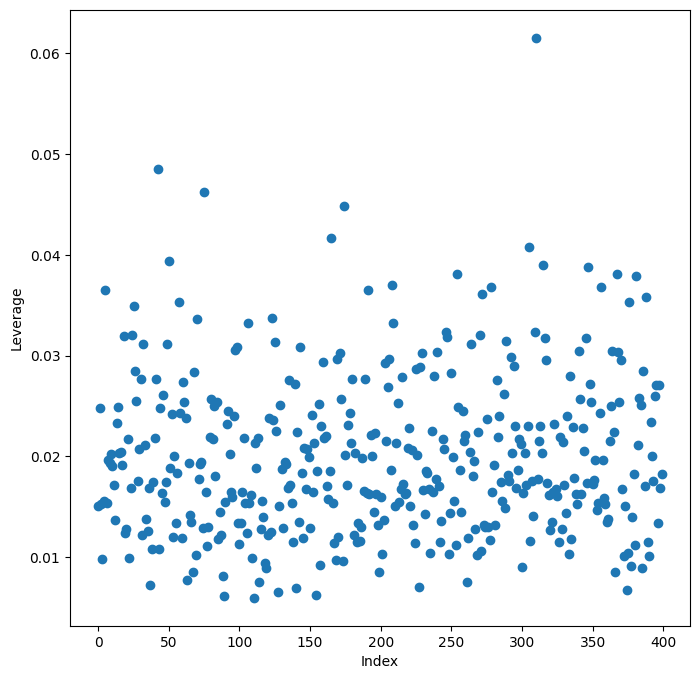

In [35]:
infl = model11.fit().get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Not much evidence of outliers and high leverage observations as seen by the plot above. Compared to the influence plot from question 9, the leverage value is much lower than it was previously.

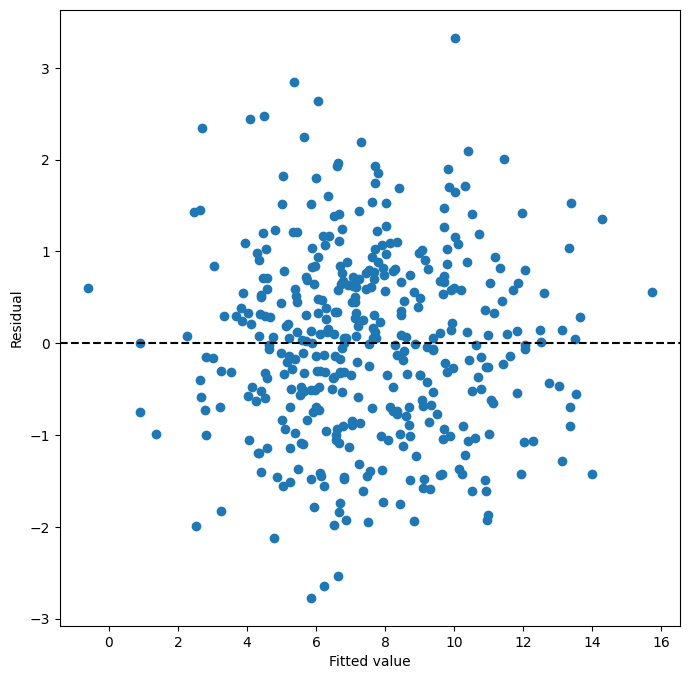

In [36]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(model11.fit().fittedvalues, model11.fit().resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

The distribution looks pretty random so more evidence towards the side of linearity.

# 15

In [37]:
Boston = load_data("Boston")
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


a. For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [38]:
#predict crim
X = Boston.drop(columns=["crim"])
y = Boston["crim"]

model12 = sm.OLS(y, X)
results = model12.fit()

summarize(results)

,coef,std err,t,P>|t|
zn,0.0450,0.019,2.391,0.017
indus,-0.0699,0.084,-0.835,0.404
chas,-0.8568,1.187,-0.722,0.471
nox,-4.0431,4.341,-0.931,0.352
rm,1.2173,0.528,2.306,0.022
age,-0.0033,0.018,-0.182,0.856
dis,-0.7762,0.256,-3.034,0.003
rad,0.5523,0.082,6.725,0.000
tax,-0.0023,0.005,-0.444,0.657
ptratio,-0.0598,0.138,-0.433,0.665


C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

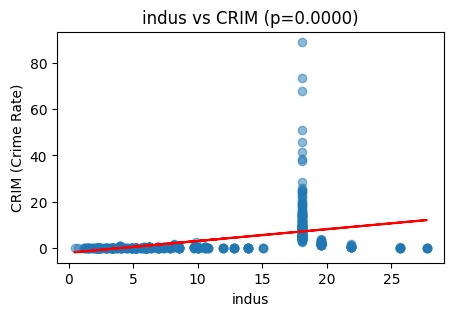

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

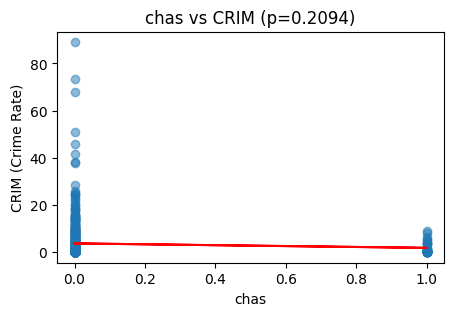

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

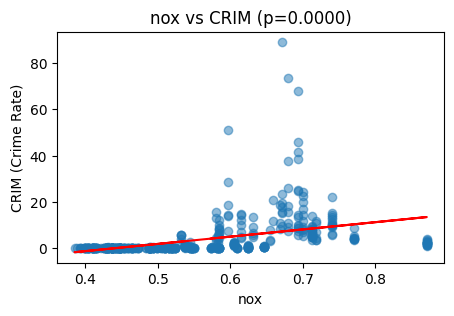

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

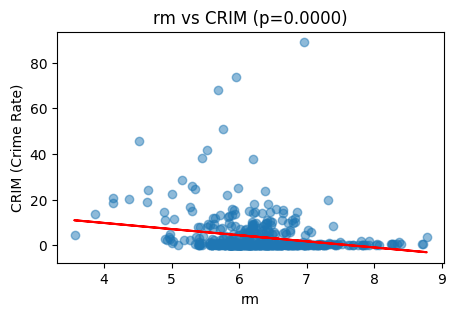

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

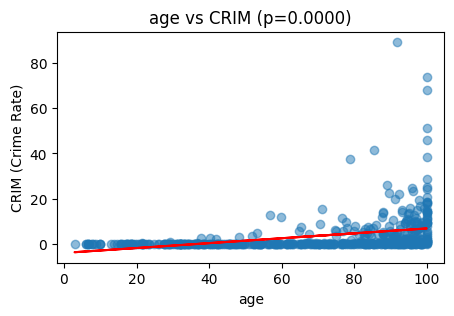

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

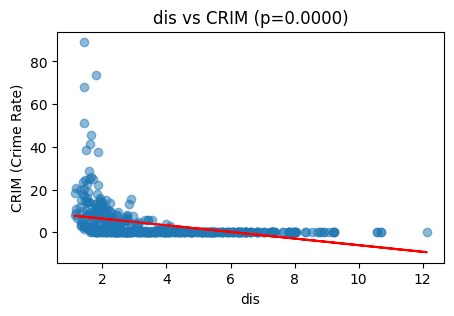

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

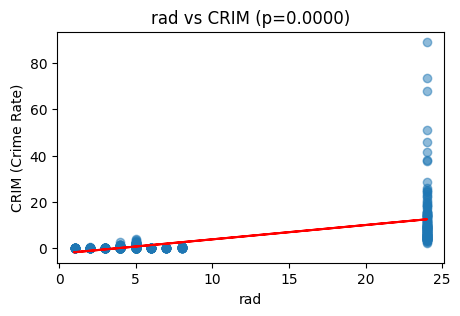

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

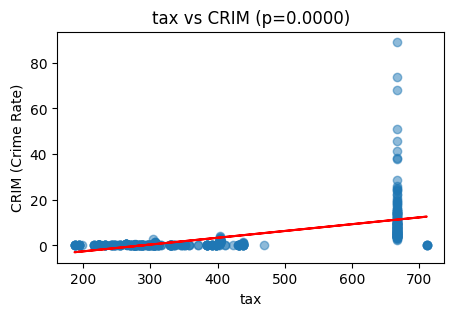

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

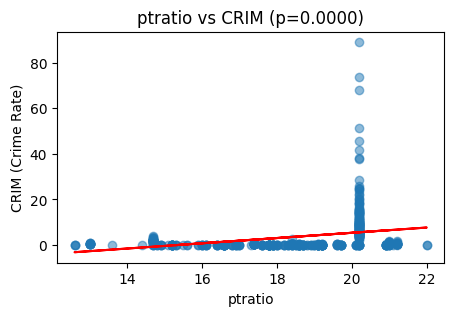

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

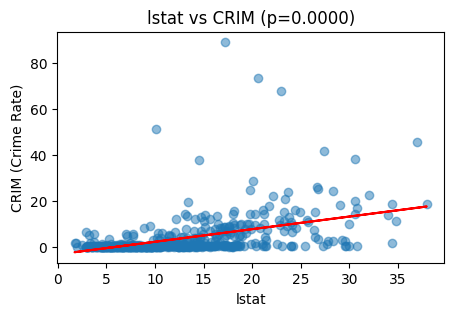

C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficients.append(model.params[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_values.append(model.pvalues[1])
C:\Users\aster\AppData\Local\Temp\ipykernel_8228\2496850290.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f"{predictor} vs

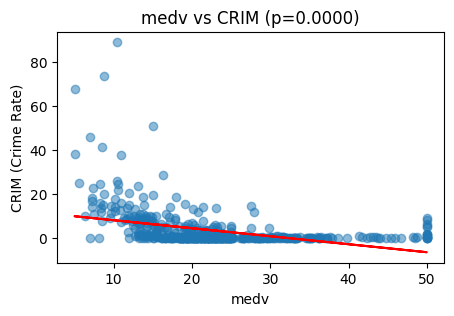

In [39]:
predictors = []
coefficients = []
p_values = []

for predictor in X.columns[1:]:
    X_single = sm.add_constant(Boston[predictor])
    model = sm.OLS(y, X_single).fit()

    predictors.append(predictor)
    coefficients.append(model.params[1])
    p_values.append(model.pvalues[1])
    
    plt.figure(figsize=(5, 3))
    plt.scatter(Boston[predictor], y, alpha=0.5)
    plt.plot(Boston[predictor], model.predict(X_single), color='red')
    plt.xlabel(predictor)
    plt.ylabel("CRIM (Crime Rate)")
    plt.title(f"{predictor} vs CRIM (p={model.pvalues[1]:.4f})")
    plt.show()

All predictors are valid except for chas.

In [40]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


b. Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [41]:


X = Boston.drop(columns=["chas", "crim"])
y = Boston["crim"]

model12 = sm.OLS(y, X)
results = model12.fit()

summarize(results)

,coef,std err,t,P>|t|
zn,0.0452,0.019,2.399,0.017
indus,-0.0760,0.083,-0.913,0.361
nox,-4.2540,4.329,-0.983,0.326
rm,1.2337,0.527,2.340,0.020
age,-0.0040,0.018,-0.221,0.826
dis,-0.7823,0.256,-3.061,0.002
rad,0.5477,0.082,6.693,0.000
tax,-0.0019,0.005,-0.374,0.709
ptratio,-0.0531,0.138,-0.385,0.700
lstat,0.1968,0.070,2.819,0.005


We can reject the null hypothesis for zn, rm, dis, rad, lstat, and medv.

c. How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-
sion model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

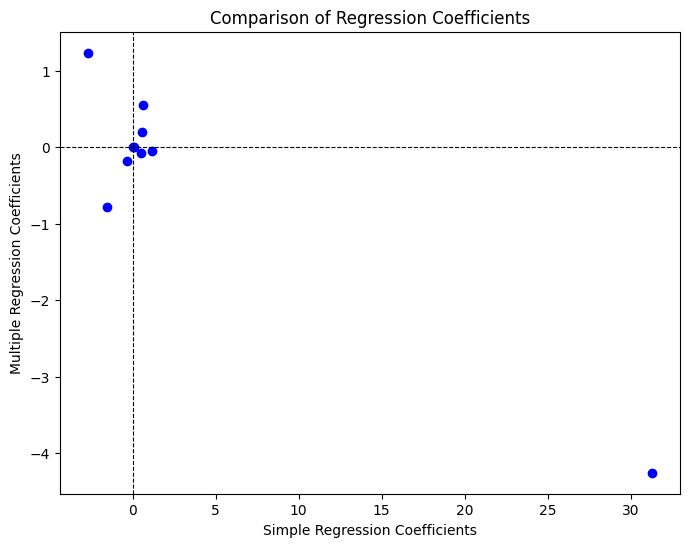

In [42]:
multi_coeffs = model12.fit().params[1:]
simple_coeffs = pd.Series(coefficients, index=predictors)

#i aligned this wrong but no idea how to do this
common_predictors = simple_coeffs.index.intersection(multi_coeffs.index)
simple_coeffs = simple_coeffs[common_predictors]
multi_coeffs = multi_coeffs[common_predictors]

plt.figure(figsize=(8, 6))
plt.scatter(simple_coeffs, multi_coeffs, color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Comparison of Regression Coefficients")
plt.show()

Part b seems to have values that are closer together, overall i think the model fits better in b.

Just going to trim the model a bit more to see if anything interesting happens.

In [43]:
X = Boston.drop(columns=["chas", "crim", "indus", "nox", "age", "tax", "ptratio"])
y = Boston["crim"]

model13 = sm.OLS(y, X)
results = model13.fit()

summarize(results)

,coef,std err,t,P>|t|
zn,0.0525,0.017,3.107,0.002
rm,0.5035,0.333,1.510,0.132
dis,-0.6238,0.197,-3.166,0.002
rad,0.4832,0.041,11.752,0.000
lstat,0.1094,0.055,2.004,0.046
medv,-0.1673,0.054,-3.073,0.002


In [44]:
X = Boston.drop(columns=["chas", "crim", "indus", "nox", "age", "tax", "ptratio", "rm"])
y = Boston["crim"]

model14 = sm.OLS(y, X)
results = model14.fit()

summarize(results)

,coef,std err,t,P>|t|
zn,0.0470,0.017,2.847,0.005
dis,-0.4562,0.163,-2.799,0.005
rad,0.5030,0.039,12.893,0.000
lstat,0.1652,0.040,4.100,0.000
medv,-0.0941,0.025,-3.795,0.000


d. Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form Y = β0 + β1X + β2X2 + β3X3 + epsilon"